# Module One Partner Project: Andy Luc and Connor Anderson 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [75]:
df = pd.read_csv('kc_house_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [76]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


Drop all records in DF where values in Waterfront are NaN.

In [77]:
df = df[~np.isnan(df['waterfront'])]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 21 columns):
id               19221 non-null int64
date             19221 non-null object
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_living      19221 non-null int64
sqft_lot         19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
view             19164 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
sqft_basement    19221 non-null object
yr_built         19221 non-null int64
yr_renovated     15809 non-null float64
zipcode          19221 non-null int64
lat              19221 non-null float64
long             19221 non-null float64
sqft_living15    19221 non-null int64
sqft_lot15       19221 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.2+ MB


In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [80]:
f = 'price~ sqft_living + bedrooms + bathrooms'

In [81]:
model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     6693.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:13:13   Log-Likelihood:            -2.6695e+05
No. Observations:               19221   AIC:                         5.339e+05
Df Residuals:                   19217   BIC:                         5.339e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.284e+04   7429.348      9.804      

In [82]:
model.params

Intercept      72835.171309
sqft_living      314.637700
bedrooms      -59569.660544
bathrooms       6907.104201
dtype: float64

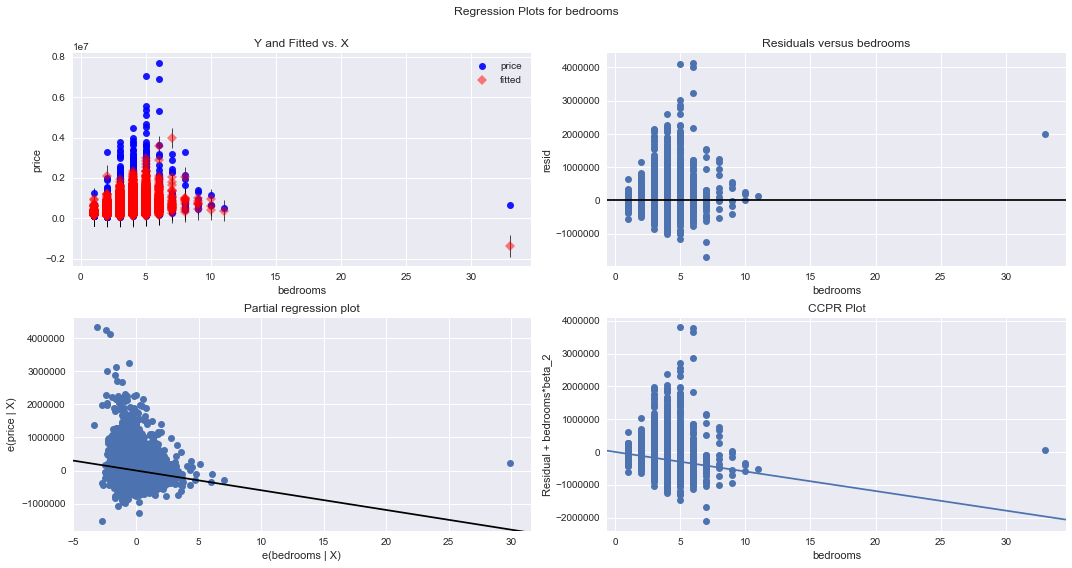

In [83]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'bedrooms', fig=fig)

Visualization

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


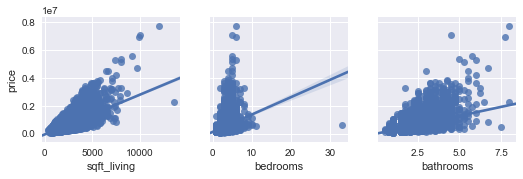

In [84]:
sns.pairplot(df,x_vars=['sqft_living','bedrooms','bathrooms'], y_vars='price', kind='reg')

Finding the RMSE of Price vs 'sqft_living','bedrooms','bathrooms'

In [85]:
import sklearn 

In [86]:
feature_cols = ['sqft_living','bedrooms','bathrooms']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

84043.73270317737
[   307.8463316  -62009.74153115  12026.68377528]


In [87]:
y_pred = linreg.predict(X_test)

In [88]:
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

175379.75435229958
75967787283.68175
275622.544948126


In [91]:
import math
math.sqrt(75967787283.68175)

275622.544948126

In [92]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


Finding the RMSE of sqft_living, yr_built, and grade

In [96]:
feature_cols = ['sqft_living15','sqft_lot15','grade']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(feature_cols, linreg.coef_)

-944339.3161971396
[ 1.17816476e+02 -2.51164498e-01  1.63927018e+05]


In [97]:
y_pred = linreg.predict(X_test)

In [98]:
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

168165.4956059962
63542725232.4011
252076.8240683802
